In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# --- パラメータ設定 ---
fs = 250  # サンプリング周波数
ft = [0.5, 40]  # バンドパスフィルタ範囲

# --- バンドパスフィルタ関数 ---
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')
    return filtfilt(b, a, data)

In [23]:
# --- データ読み込み ---
df = pd.read_excel('EEGdata2.xlsx', skiprows=1).to_numpy()

In [40]:
# --- 信号の抽出とフィルタリング ---
Trig = df[:, 13]
EEG_channels = [bandpass_filter(df[:, i], ft[0], ft[1], fs) for i in range(1, 9)]

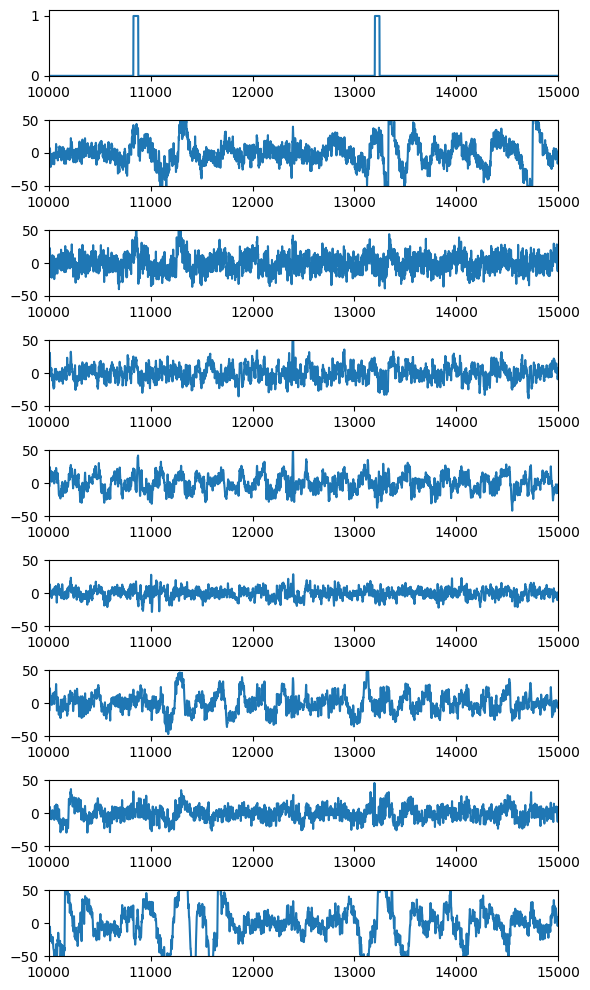

In [41]:
# --- 図1：生データ表示 ---
xl = [10000, 15000]
yl = [-50, 50]
fig1, axs = plt.subplots(9, 1, figsize=(6, 10))
axs[0].plot(Trig)
axs[0].set_xlim(xl); axs[0].set_ylim([0, 1.1])
for i, eeg in enumerate(EEG_channels):
    axs[i+1].plot(eeg)
    axs[i+1].set_xlim(xl)
    axs[i+1].set_ylim(yl)
fig1.tight_layout()

In [42]:
# --- トリガー整列データの抽出 ---
t = np.where(np.diff(Trig) == 1)[0]
anlwin = (np.array([-2, 1]) * fs).astype(int)

def extract_segments(signal, indices, window):
    return np.array([
        signal[i + window[0] : i + window[1]]
        for i in indices
        if i + window[0] >= 0 and i + window[1] < len(signal)
    ])

tTrig = extract_segments(Trig, t, anlwin)
tEEG = [extract_segments(sig, t, anlwin) for sig in EEG_channels]

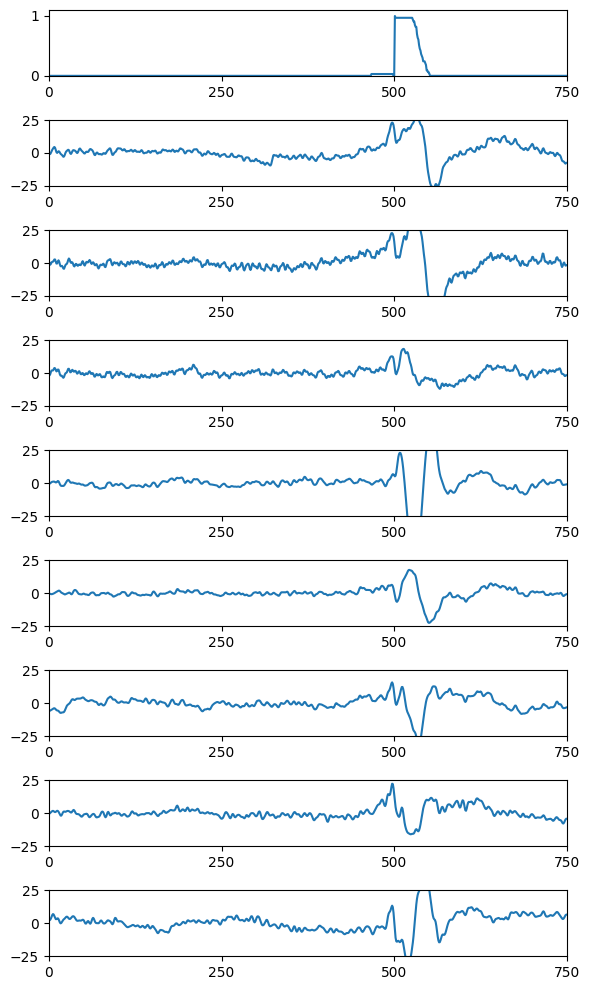

In [43]:
# --- 図2：トリガー整列平均波形 ---
xl = [0, 750]
yl = [-25, 25]
xticks = np.arange(0, xl[1]+1, 250)
fig2, axs2 = plt.subplots(9, 1, figsize=(6, 10))
axs2[0].plot(np.nanmean(tTrig, axis=0))
axs2[0].set_xlim(xl); axs2[0].set_ylim([0, 1.1])
axs2[0].set_xticks(xticks)
for i, eeg_seg in enumerate(tEEG):
    axs2[i+1].plot(np.nanmean(eeg_seg, axis=0))
    axs2[i+1].set_xlim(xl)
    axs2[i+1].set_ylim(yl)
    axs2[i+1].set_xticks(xticks)
fig2.tight_layout()
plt.show()